In [1]:
data = Import["salaries.csv", "CSV"];

In [2]:
graph = Graph[UndirectedEdge @@@ data];

In [3]:
partition[graph_] := 
    Module[{list, listA, listB, subList, added},
        list = VertexList[graph];
        listA = {list[[1]]};
        listB = AdjacencyList[graph, list[[1]]];

        (* Itera sobre los vértices restantes del grafo *)
        For[i = 2, i <= Length[list], i++, 
            If[!MemberQ[Join[listA, listB], list[[i]]],
                subList = AdjacencyList[graph, list[[i]]];
                added = False;
                (* Itera sobre los vecinos del vértice actual *)
                For[j = 1, j <= Length[subList] && !added, j++,
                    (* Si uno de los vecinos está en la lista A,
                    añade el vértice a la lista B *)
                    If[MemberQ[listA, subList[[j]]], 
                        AppendTo[listB, list[[i]]]; 
                        added = True
                    ];
                    (* Si uno de los vecinos está en la lista B,
                    añade el vértice a la lista A *)
                    If[MemberQ[listB, subList[[j]]], 
                        AppendTo[listA, list[[i]]]; 
                        added = True
                    ]
                ];
                (* Si no se ha añadido el vértice a ninguna lista,
                lo añade a la lista A por defecto *)
                If[!added,
                    AppendTo[listA, list[[i]]]
                ]
            ]
        ];   
        {listA, listB}
    ]
(* Función que verifica si un grafo es bipartito y retorna la 
partición de conjuntos si es así *)
partitionedSets[graph_] :=
    Module[{partitions},
        If[BipartiteGraphQ[graph],
            partitions = partition[graph];
            Print["la longitud de los conjuntos particionados son:"];
            Print["Para U: ", Length[partitions[[1]]], " y Para V: ", Length[partitions[[2]]]];
            Print["Algunos datos son:"];
            Print["Para U:  ", RandomSample[partitions[[1]],5]];
            Print["Para V:  ", RandomSample[partitions[[2]],5]],
            "No es un grafo bipartito"
        ]
    ]
projection[graph_, setUorV_] :=
    Module[{projectedGraph, set, list1, list2},
        set = Switch[setUorV,
            U, partition[graph][[1]],
            V, partition[graph][[2]]
        ];
        projectedGraph = {};

        (* Itera sobre cada vértice en el conjunto seleccionado (set). *)
        For[i = 1, i <= Length[set], i++,
        list1 = AdjacencyList[graph, set[[i]]];
            (* Para cada vértice j en el conjunto set, verifica si existe una intersección 
            entre los vecinos de los vértices i y j. *)
            For[j = 1, j <= Length[set], j++,
                If[i != j,
                   list2 = AdjacencyList[graph, set[[j]]];
                   (* Si los conjuntos de adyacencia de i y j tienen elementos en común (hay una intersección) 
                   y aún no se ha agregado la conexión (arista) entre ellos, se añade al grafo proyectado. *)
                   If[Intersection[list1, list2] != {} && !EdgeQ[projectedGraph, set[[j]] <-> set[[i]]],
                       AppendTo[projectedGraph, set[[i]] <-> set[[j]]]
                   ]
                ]
            ]
        ];
        projectedGraph
    ]

projections[graph_, setUorV_] := 
    If[BipartiteGraphQ[graph],
        (* Según el valor de setUorV, calcula la proyección del conjunto U o V sobre el conjunto contrario. *)
        Switch[setUorV,
            U, Print["Un subgrafo de la proyeccion del conjunto U sobre V es: "]; 
            Graph[RandomSample[projection[graph,U], 100], GraphLayout -> "SpringEmbedding"],
            V, Print["Un subgrafo de la proyeccion del conjunto V sobre U es: "]; 
            Graph[RandomSample[projection[graph,V], 100], GraphLayout -> "SpringEmbedding"],
            _, "Conjunto Invalido"
        ],
        "No es un grafo bipartito"
    ]

In [8]:
partitionedSets[graph]

la longitud de los conjuntos particionados son:
Para U: 289 y Para V: 130
Algunos datos son:
Para U:  {Staff Data Analyst, People Data Analyst, Data Integrity Analyst, 
 
>    Engineering Manager, Data DevOps Engineer}
Para V:  {391977.4 - 396412.43, 63785.31 - 68220.34, 281101.69 - 285536.72, 
 
>    19435.03 - 23870.06, 134745.76 - 139180.79}


-Graphics-
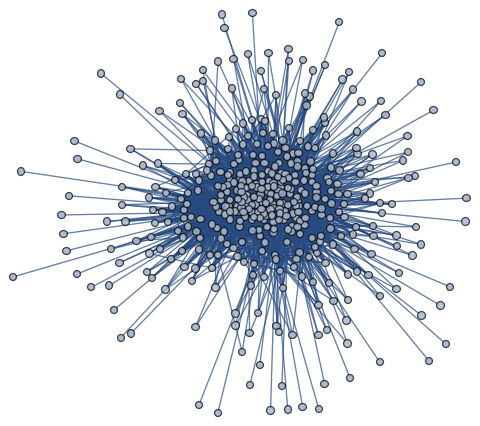

In [9]:
GraphPlot[graph]

In [10]:
graphU = projection[graph, U];

In [26]:
a = VertexList[graphU];
Length[a]

289

In [28]:
b = {};
For[i = 1, i <= Length[a], i++,
    AppendTo[b, Length[AdjacencyList[graphU, a[[i]]]]]
];
Max[b]

288

In [23]:
Position[b, 288]

{{2}, {31}}

In [24]:
a[[2]]
a[[31]]

Engineer
Machine Learning Engineer